## Part 1: Using a CNN to classify digits in the MNIST Dataset

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
from torch import optim
import matplotlib.pyplot as plt
from torchvision import transforms
import numpy as np

In [2]:
train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor(), 
                       target_transform=(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))
test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Epoch [1/20], Loss: 0.0571, Accuracy: 62.73 %
Epoch [2/20], Loss: 0.0528, Accuracy: 76.92 %
Epoch [3/20], Loss: 0.0523, Accuracy: 78.55 %
Epoch [4/20], Loss: 0.0521, Accuracy: 79.30 %
Epoch [5/20], Loss: 0.0501, Accuracy: 85.72 %
Epoch [6/20], Loss: 0.0492, Accuracy: 88.51 %
Epoch [7/20], Loss: 0.0492, Accuracy: 88.69 %
Epoch [8/20], Loss: 0.0491, Accuracy: 89.00 %
Epoch [9/20], Loss: 0.0470, Accuracy: 95.79 %
Epoch [10/20], Loss: 0.0462, Accuracy: 98.14 %
Epoch [11/20], Loss: 0.0462, Accuracy: 98.32 %
Epoch [12/20], Loss: 0.0461, Accuracy: 98.53 %
Epoch [13/20], Loss: 0.0461, Accuracy: 98.56 %
Epoch [14/20], Loss: 0.0461, Accuracy: 98.61 %
Epoch [15/20], Loss: 0.0461, Accuracy: 98.63 %
Epoch [16/20], Loss: 0.0461, Accuracy: 98.68 %
Epoch [17/20], Loss: 0.0461, Accuracy: 98.70 %
Epoch [18/20], Loss: 0.0461, Accuracy: 98.71 %
Epoch [19/20], Loss: 0.0461, Accuracy: 98.65 %
Epoch [20/20], Loss: 0.0460, Accuracy: 98.77 %


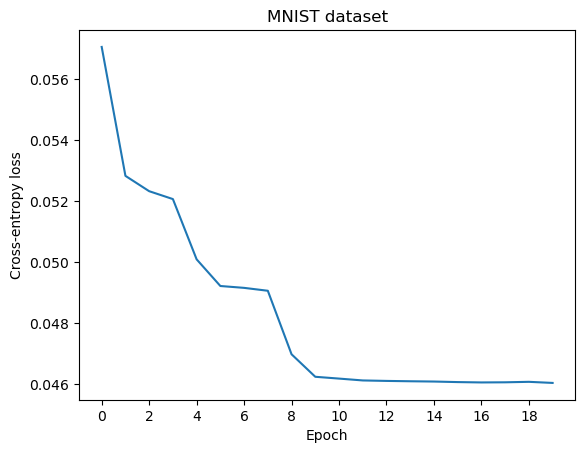

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)   # input is the dimensions of the MNIST data
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3)
        self.conv4 = nn.Conv2d(32, 16, kernel_size=3)
        self.fc1 = nn.Linear(6400, 10)    # 10 target classes, 6400 = 16*20*20

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = torch.flatten(x,1)
        output = F.softmax(self.fc1(x), dim=1)   # output layer
        return output
    
    # training
    def fit(self, dataloader, train=True):
        iterations = 20 if train == True else 1
        optimizer = optim.SGD(self.parameters(), lr=0.01, momentum=0.9)   
        arr = []
        
        for i in range(iterations):
            accuracy = 0
            loss_values = 0
            total = 0
        
            for x, y in loader_train: 
                optimizer.zero_grad()
                prediction = self.forward(x)  
                target = y
                loss = nn.CrossEntropyLoss()  # multi-class classification
                error = loss(prediction, y)  
               
                if train == True:                   
                    error.backward()     # backpropagation (only for training)
                    optimizer.step()   # parameter update
                
                loss_values += error.item()  # convert a tensor into a number
        
                output = torch.max(prediction, 1).indices    # max indices in each row of the tensor
                target_value = torch.max(y, 1).indices
                total += y.size(0)  # get number of rows in a matrix that is [32,10]
                accuracy += (output == target_value).sum().item() 
                
            accuracy = 100 * accuracy / total
            
            if train == True:
                arr.append(loss_values / total)        
            
            print("Epoch [%d/%d], Loss: %.4f, Accuracy: %.2f %%" % (i+1, iterations, loss_values / total, accuracy))
        
        if train == True:
            epoch = [i for i in range(iterations)]  
            plt.xlabel("Epoch")
            plt.ylabel("Cross-entropy loss")
            plt.xticks(np.arange(min(epoch), max(epoch)+1, 2))
            plt.title("MNIST dataset")
            plt.plot(epoch, arr)
        
# target_transform: one-hot encoding of the labels, e.g. 5 -> [0,0,0,0,0,1,0,0,0,0]
train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor(), 
                       target_transform=(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))
test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

loader_train = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)  

model = CNN()
model.fit(loader_train) 

In [6]:
loader_test = torch.utils.data.DataLoader(test, batch_size=32, shuffle=False)  
model.fit(loader_test, False)

Epoch [1/1], Loss: 0.0460, Accuracy: 98.81 %


## Part 2: Kmeans Algorithm

In [7]:
# k-means algorithm
import numpy as np
from scipy.spatial.distance import euclidean

def your_kMeans(k, data, max_iterations=100):

    X = tuple(data)
    data_ind = np.arange(0,len(data))
    centroid_ind_sel = np.random.choice(data_ind, k)
    centroids = list(X[i] for i in centroid_ind_sel)
    
    n = 0
    while n < max_iterations:
        clusters = [[] for i in range(k)]
        # putting every point into the nearest cluster
        for i in range(len(data)):
            # compare the euclidean distance of every point to each element in the centroid
            distance = [0 for i in range(k)]

            minimum = np.inf 
            for j in range(len(clusters)):   # finding the min. distance to each centroid
                distance = euclidean(data[i], centroids[j])
                if minimum > distance:
                    minimum = distance
                    index = j

            clusters[index].append(data[i])    # put the point to the cluster that has the minimum distance

        # update centroids 
        for i in range(len(centroids)):         # number of clusters
            for j in range(len(clusters[i])):  
                centroids[i] = np.mean(clusters[i], axis=0) # finding the average of all centroids
                
        # within cluster variance
        var = [[] for _ in range(k)]
        for i in range(k):
            mean = np.mean(clusters[i], axis=0)
            for datapoint in clusters[i]:
                var[i].append(np.linalg.norm(datapoint-mean)**2)
            var[i] = sum(var[i])
        
        n += 1
    return var

your_kMeans(3, [[0,1],[10,1],[5,1],[0,2],[10,2],[5,2]])

/home/yatingyang/.local/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yatingyang/.local/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[0.5, 0.5, 0.5]

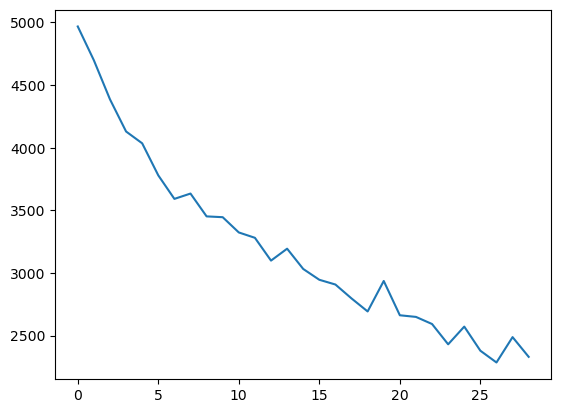

In [8]:
# plot the (summed) within cluster variance for different k's on the mnist dataset

test_dataloader = torch.utils.data.DataLoader(test, batch_size=100, shuffle=False)
X = next(iter(test_dataloader))
X = X[0]   # we just want the 28 x 28 image without the label
X_flat = torch.flatten(X, 1).numpy()   # convert the tensor into a numpy array

y = []
n = 30

for k in range(1,n):
    var_list = your_kMeans(k, X_flat)
    y.append(sum(var_list))  

x = [i for i in range(n-1)]
plt.plot(x,y)
plt.show()